<a href="https://colab.research.google.com/github/zohansyahfatomi/random-projects/blob/main/Loan_Approval_MachineLearning_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Permasalahan

Pinjam-meminjam merupakan bisnis utama pada bank. Namun demikian, sering kali permasalahan muncul ketika pelanggan Bank tidak bisa membayar tagihan peminjaman. Oleh karena itu, untuk mencegah permasalahan yang demikian perlu dilakukan *profiling* pada pelanggan Bank yaitu menentukan kriteria pada seseorang apakah layak mendapatkan pinjaman atau tidak oleh bank.

Pada kesempatan ini, kita akan melakukan tugas **klasifikasi** terkait dengan **kemampuan** atau **ketidakmampuan** seseorang dalam membayar pinjaman di Bank berdasarkan profil yang dia miliki. 

In [1]:
# mengimpor modul atau library

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [2]:
# membaca data csv
data = pd.read_csv("/content/drive/MyDrive/Dataset.csv")
data_original = data.copy()
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Wrangling & Exploratory Data Analysis


## Understanding Data

In [3]:
# Menunjukan kolom pada data
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
# Menunjukan tipe data pada setiap kolom (feature)
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
# Menunjukan nilai unik untuk setiap kolom
for column in data.columns:
    if (column == "Loan_ID") or (column == "ApplicantIncome") or (column == "CoapplicantIncome") or (column == "LoanAmount"):
        print(f"{column} : {data[column].unique()[:5]}")
    else:    
        print(f"{column} : {data[column].unique()}")


Loan_ID : ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008']
Gender : ['Male' 'Female' nan]
Married : ['No' 'Yes' nan]
Dependents : ['0' '1' '2' '3+' nan]
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes' nan]
ApplicantIncome : [5849 4583 3000 2583 6000]
CoapplicantIncome : [   0. 1508. 2358. 4196. 1516.]
LoanAmount : [ nan 128.  66. 120. 141.]
Loan_Amount_Term : [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
Credit_History : [ 1.  0. nan]
Property_Area : ['Urban' 'Rural' 'Semiurban']
Loan_Status : ['Y' 'N']


In [6]:
# Menunjukan dimensi atau ukuran data set.
data.shape

(614, 13)

Terdapat 13 kolom atau variabel atau *feature* pada `Dataset.csv`:
1. `Loan_ID`: Nomor ID unik peminjaman 
2. `Gender`: Jenis kelamin 
3. `Married`: Status Pernikahan 
4. `Dependents`: Jumlah tanggungan anak
5. `Education`:  Tingkat Pendidikan
6. `Self_Employed`: Apakah seorang entrepreneur
7. `ApplicantIncome`: Jumlah pendapatan 
8. `CoapplicantIncome`: Jumlah pendapatan bersama  
9. `LoanAmount`: Jumlah pendapatan dalam ribuan dollar
10. `Loan_Amount_Term`: Jangka waktu pinjaman dalam beberapa bulan
11. `Credit_History`: Catatan Hutang apakah memenuhi peraturan atau tidak?
12. `Property_Area`: Area properti apakah di pedesaan atau diperkotaan atau di semi pedesaan-perkotaan
13.`Loan_Status`: Persetujuan peminjaman, apakah disetujui atau ditolak.

Dimana `Loan_Status` merupakan variabel gayut (tak bebas) atau variabel target.

Ukuran dataset adalah `(614, 13)` dimana terdiri dari:
- baris : 614 (baris merupakan jumlah masukan (*entry*) data).
- kolom : 13 (kolom merupakan jumlah `feature` atau variabel).




## Visualisasi Data

### Univariate Analysis

Y    422
N    192
Name: Loan_Status, dtype: int64

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: >

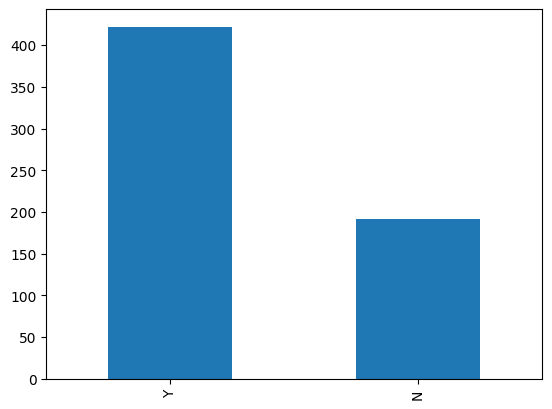

In [7]:
display(data["Loan_Status"].value_counts())
display(data["Loan_Status"].value_counts(normalize=True))
data["Loan_Status"].value_counts().plot.bar()

Total aplikasi pinjaman adalah 614 dan 422 di antaranya atau sekitar 69% diterima.

Melakukan visualisasi data berdasarkan tipe variabel (*feature*): variabel kategorikal, variabel ordinal dan variabel numerik.

- Variabel kategori: Memiliki nilai yang berupa kategori atau pengelompokan (`Gender`, `Married`, `Self_Employed`, `Credit_History`, `Loan_Status`)
- Variabel ordinal: Memiliki nilai yang berupa kategori namun memiliki tingkatan atau derajat keteraturan tertentu (`Dependents`, `Education`, `Property_Area`)
- Variabel numerik: Memiliki nilai variabel yang bersifat numeris (angka-angka) (`ApplicantIncome`, `Co-applicantIncome`, `LoanAmount`, `Loan_Amount_Term`)

####  Visualisasi Data Variabel Kategorik  (`Gender`, `Married`, `Self_Employed`, `Credit_History`, `Loan_Status`)

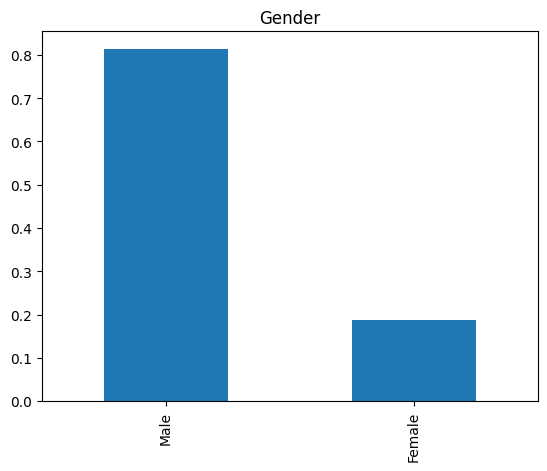

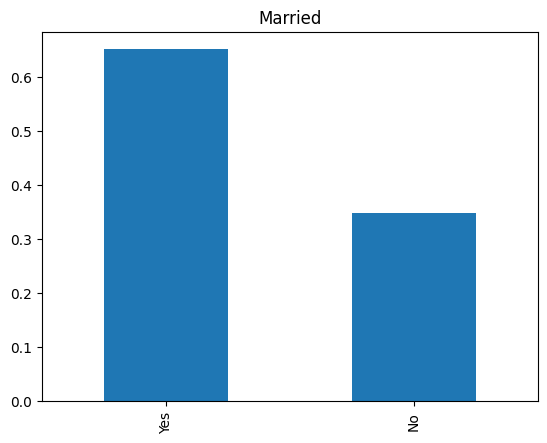

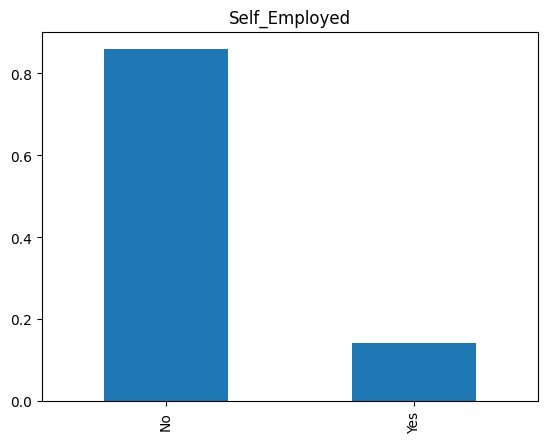

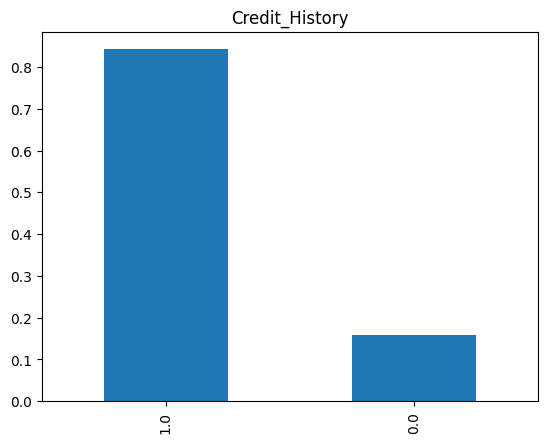

In [8]:
data["Gender"].value_counts(normalize=True).plot.bar(title="Gender")
plt.show()

data["Married"].value_counts(normalize=True).plot.bar(title="Married")
plt.show()

data["Self_Employed"].value_counts(normalize=True).plot.bar(title="Self_Employed")
plt.show()

data["Credit_History"].value_counts(normalize=True).plot.bar(title="Credit_History")
plt.show()

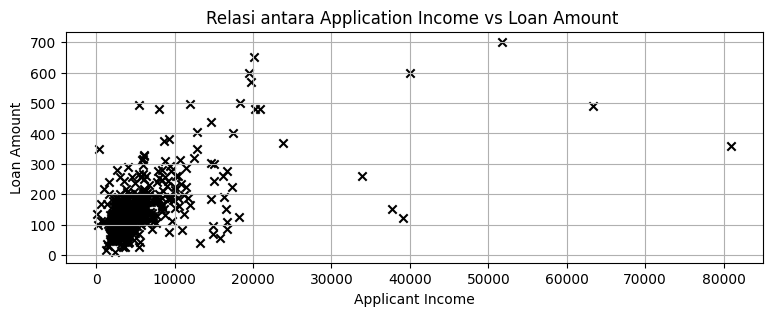

In [9]:
plt.figure(figsize=(9, 3))
plt.title("Relasi antara Application Income vs Loan Amount ")

plt.grid()
plt.scatter(data['ApplicantIncome'] , data['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

Dapat disimpulkan bahwa:

- Berdasarkan Grafik `Gender`: Sekitar 80% peminjam merupakan seorang laki-laki.
- Berdasarkan Grafik `Married`: Sekitar 65% peminjam merupakan telah menikah.
- Berdasarkan Grafik `Self_Employed`: Sekitar 15% peminjam merupakan seorang entrepreneur.
- Berdasarkan Grafik `Credit_History`: Sekitar 85% peminjam telah peminjaman sebelumnya
- Berdasarkan Grafik `Relasi antara Application Income vs Loan Amount`: Peminjam dengan Income rendah akan mendapatkan pinjaman yang rendah. Dan kebanyakan peminjam memiliki penghasilan yang rendah.

#### Visualisasi Data Variabel Ordinal  (`Dependents`, `Education`, `Property_Area`)

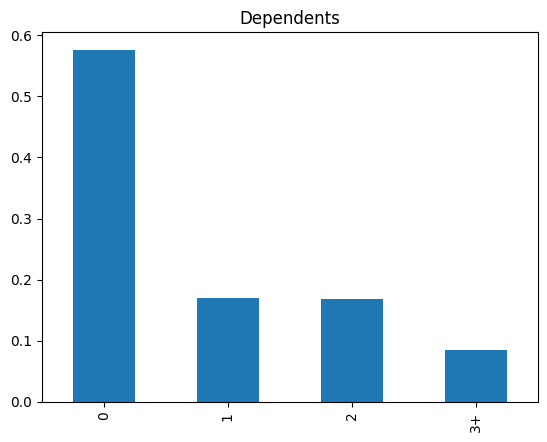

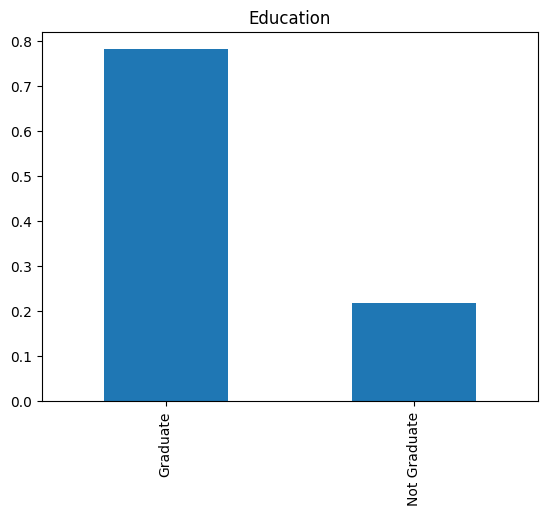

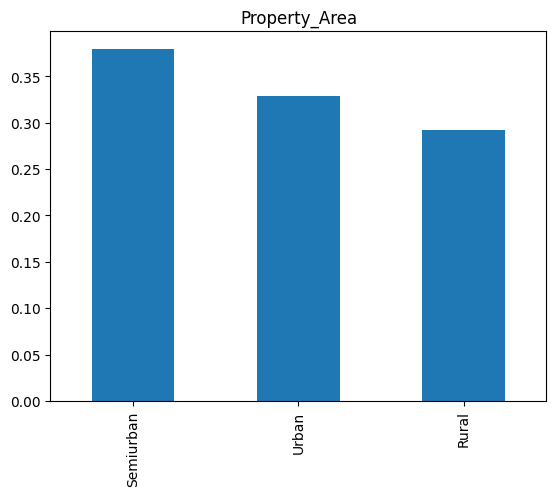

In [10]:
data["Dependents"].value_counts(normalize=True).plot.bar(title="Dependents")
plt.show()

data["Education"].value_counts(normalize=True).plot.bar(title="Education")
plt.show()

data["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")
plt.show()


Dapat disimpulkan bahwa:

- Berdasarkan Grafik `Dependents`: Sebagian besar peminjam tidak memiliki tanggungan anak.
- Berdasarkan Grafik `Education`: Sekitar 80% peminjam telah menyelesaikan pendidikan Pascasarjana.
- Berdasarkan Grafik `Property_Area`: Sebagian besar peminjam berasal dari daerah semi urban.

#### Distribusi Data pada Variable Numerikal 
(`ApplicantIncome`, `Co-applicantIncome`, `LoanAmount`)

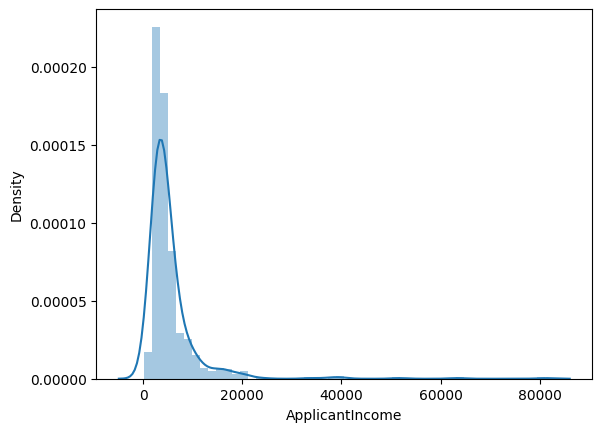

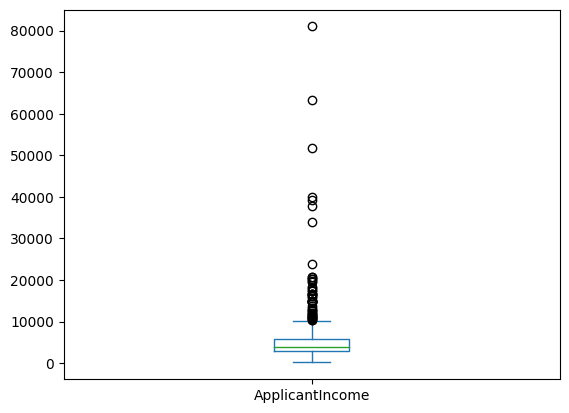

In [11]:
sns.distplot(data["ApplicantIncome"])
plt.show()

data["ApplicantIncome"].plot.box()
plt.show()

Text(0.5, 0.98, '')

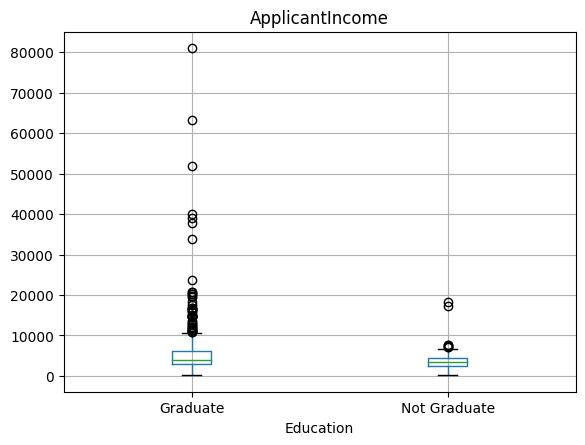

In [12]:
data.boxplot(column="ApplicantIncome", by = "Education") 
plt.suptitle("")

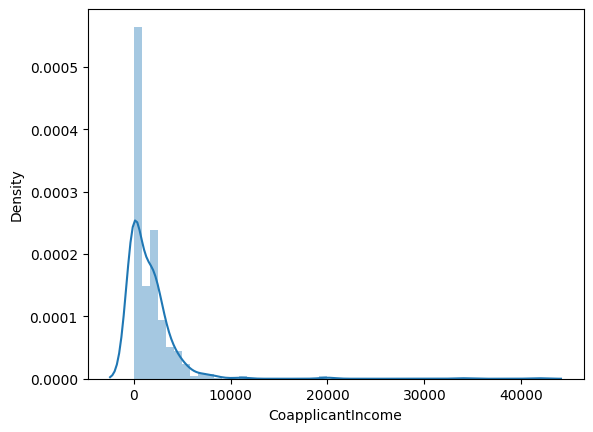

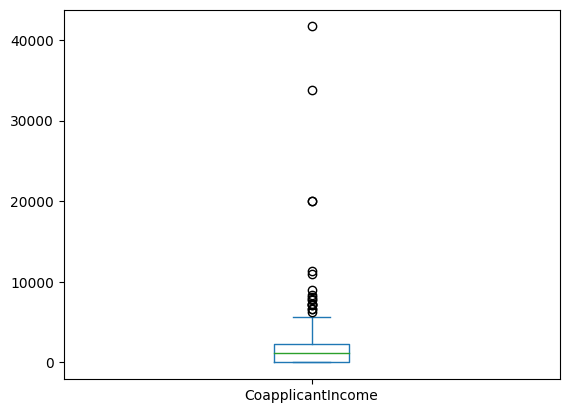

In [13]:
sns.distplot(data["CoapplicantIncome"])
plt.show()

data["CoapplicantIncome"].plot.box()
plt.show()

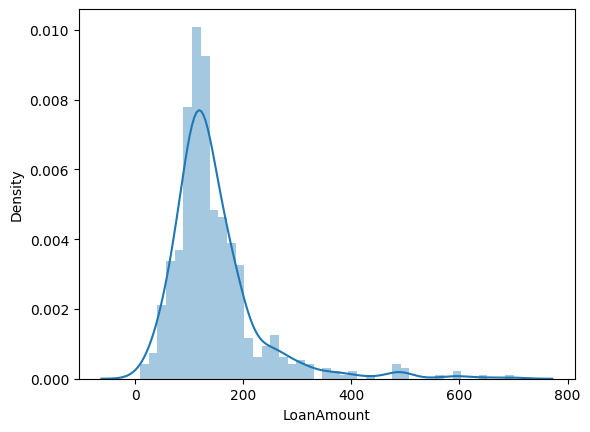

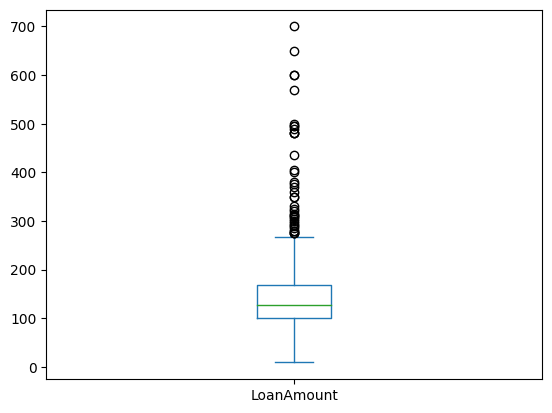

In [14]:
data.notna()

sns.distplot(data["LoanAmount"])
plt.show()

data["LoanAmount"].plot.box()
plt.show()

## Analisa Bivariate 



### Categorical Independent Variable vs Target Variable

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


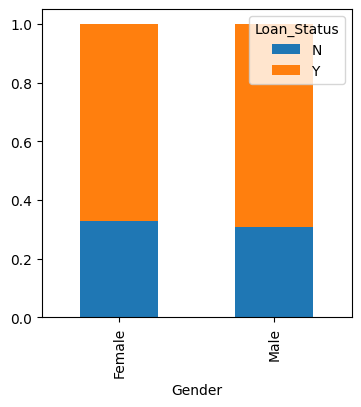

In [15]:
Gender=pd.crosstab(data["Gender"],data["Loan_Status"])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

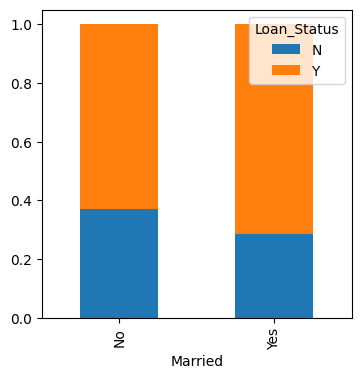

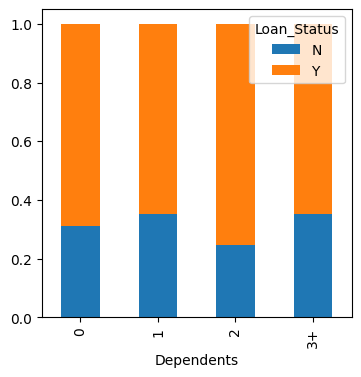

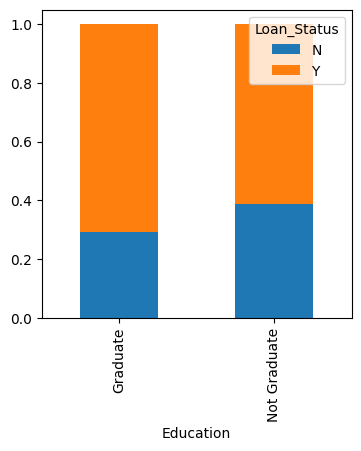

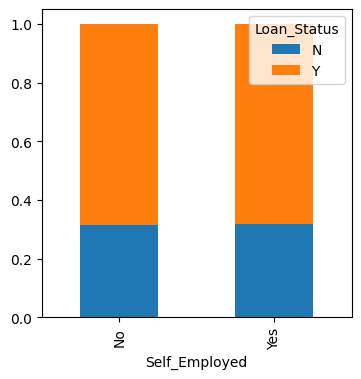

In [16]:
Married=pd.crosstab(data["Married"],data["Loan_Status"])
Dependents=pd.crosstab(data["Dependents"],data["Loan_Status"])
Education=pd.crosstab(data["Education"],data["Loan_Status"])
Self_Employed=pd.crosstab(data["Self_Employed"],data["Loan_Status"])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

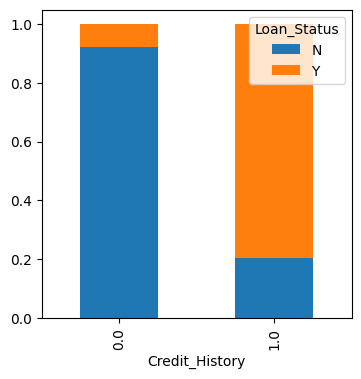

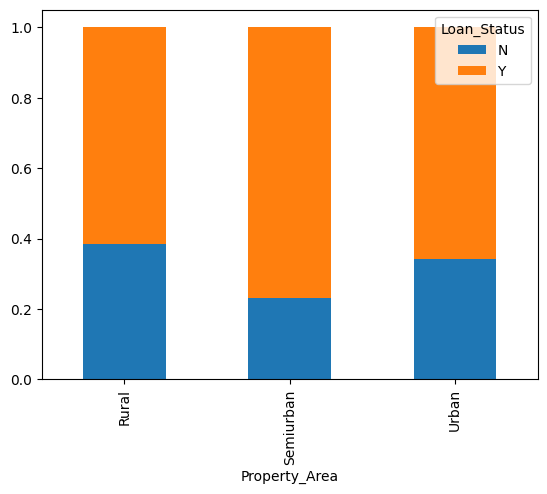

In [17]:
Credit_History=pd.crosstab(data["Credit_History"],data["Loan_Status"])
Property_Area=pd.crosstab(data["Property_Area"],data["Loan_Status"])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

# Data Preprocessing

### Missing Value Handling

In [18]:
data = data_original

In [19]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Ada nilai `NaN` pada beberapa entri data di setiap variabel berikut:
- `Gender`
- `Married`
- `Dependents`
- `Self_Employed`
- `Credit_History`
- `Loan_Amount_Term`
- `LoanAmount`



Metode untuk mengatasi nilai `NaN`:
1. Pada variabel numerik: gunakan *mean* atau *median*
2. Pada variabel kategorik: gunakan *mode*

In [20]:
data["Gender"].fillna(data["Gender"].mode()[0], inplace=True)
data["Married"].fillna(data["Married"].mode()[0], inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0], inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0], inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0], inplace=True)

In [21]:
data["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0], inplace=True)

In [23]:
data["LoanAmount"].fillna(data["LoanAmount"].median(), inplace=True)

In [24]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Outlier Handling

Pada grafik boxplot sebelumnya dapat diamati bahwa terdapat outlier pada variabel numerik. Outlier atau nilai ekstrim tersebut dapat mempengaruhi model statistik yang ingin kita bangun yaitu nilai rerata (mean) dan standar deviasi.

Outlier yang muncul menyebabkan distribusi bersifat *right skewness*. Dalam hal ini, kita ingin menghilangkan *skewness* dengan melakukan transformasi logaritmik.

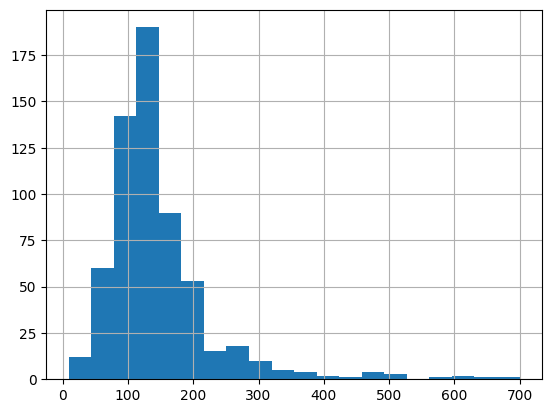

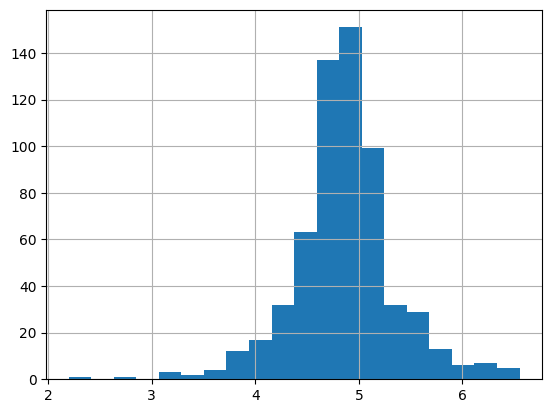

In [25]:
data["LoanAmount"].hist(bins=20)
plt.show()

# transformasi logartitmik
data["LoanAmount_log"]=np.log(data["LoanAmount"])

data["LoanAmount_log"].hist(bins=20)
plt.show()

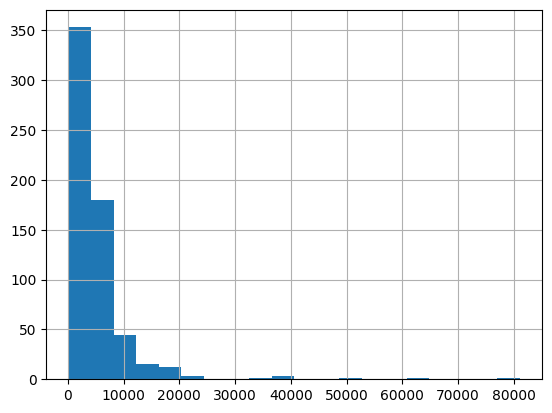

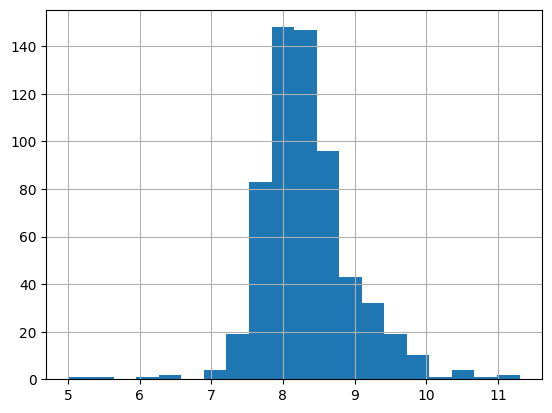

In [26]:
data["ApplicantIncome"].hist(bins=20)
plt.show()

data["ApplicantIncome_log"]=np.log(data["ApplicantIncome"])

data["ApplicantIncome_log"].hist(bins=20)
plt.show()


In [27]:
# drop kolom Loan Amount dan ApplicantIncome
data = data.drop("LoanAmount",axis=1)
data = data.drop("ApplicantIncome",axis=1)

In [28]:
# Menghilangkan kolom Load_ID
data = data.drop("Loan_ID",axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log
0,Male,No,0,Graduate,No,0.0,360.0,1.0,Urban,Y,4.852030,8.674026
1,Male,Yes,1,Graduate,No,1508.0,360.0,1.0,Rural,N,4.852030,8.430109
2,Male,Yes,0,Graduate,Yes,0.0,360.0,1.0,Urban,Y,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,2358.0,360.0,1.0,Urban,Y,4.787492,7.856707
4,Male,No,0,Graduate,No,0.0,360.0,1.0,Urban,Y,4.948760,8.699515


Mengganti variabel kategorik dengan numerik. Machine learning hanya bisa mendapatkan feed berupa data numerik (integer atau float dll)

In [29]:
data = pd.get_dummies(data)

# Drop columns
data = data.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
data.rename(columns=new, inplace=True)

data.head()

,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount_log,ApplicantIncome_log,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0.0,360.0,1.0,4.852030,8.674026,1,0,1,0,0,0,1,0,0,0,1,1
1,1508.0,360.0,1.0,4.852030,8.430109,1,1,0,1,0,0,1,0,1,0,0,0
2,0.0,360.0,1.0,4.189655,8.006368,1,1,1,0,0,0,1,1,0,0,1,1
3,2358.0,360.0,1.0,4.787492,7.856707,1,1,1,0,0,0,0,0,0,0,1,1
4,0.0,360.0,1.0,4.948760,8.699515,1,0,1,0,0,0,1,0,0,0,1,1


In [30]:
data.head()

,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount_log,ApplicantIncome_log,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0.0,360.0,1.0,4.852030,8.674026,1,0,1,0,0,0,1,0,0,0,1,1
1,1508.0,360.0,1.0,4.852030,8.430109,1,1,0,1,0,0,1,0,1,0,0,0
2,0.0,360.0,1.0,4.189655,8.006368,1,1,1,0,0,0,1,1,0,0,1,1
3,2358.0,360.0,1.0,4.787492,7.856707,1,1,1,0,0,0,0,0,0,0,1,1
4,0.0,360.0,1.0,4.948760,8.699515,1,0,1,0,0,0,1,0,0,0,1,1


In [31]:
X = data.drop("Loan_Status",1)
y = data["Loan_Status"]

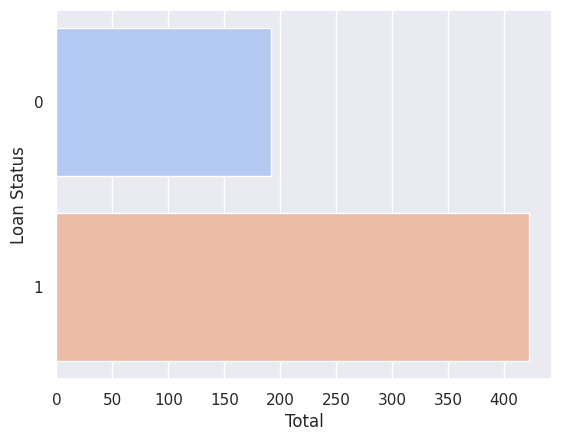

In [32]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=data, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [33]:
X, y = SMOTE().fit_resample(X, y)

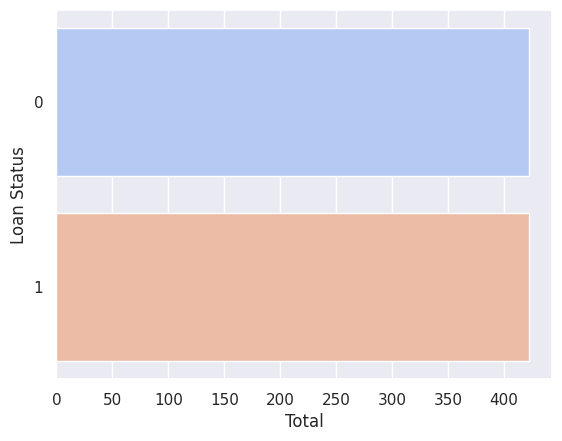

In [34]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=data, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [35]:
X.head()

,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount_log,ApplicantIncome_log,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,360.0,1.0,4.852030,8.674026,1,0,1,0,0,0,1,0,0,0,1
1,1508.0,360.0,1.0,4.852030,8.430109,1,1,0,1,0,0,1,0,1,0,0
2,0.0,360.0,1.0,4.189655,8.006368,1,1,1,0,0,0,1,1,0,0,1
3,2358.0,360.0,1.0,4.787492,7.856707,1,1,1,0,0,0,0,0,0,0,1
4,0.0,360.0,1.0,4.948760,8.699515,1,0,1,0,0,0,1,0,0,0,1


In [36]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: uint8

## Machine Learning (Logistic Regression)

In [37]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [38]:
print(f"X_train shape:  {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_test shape:  {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

X_train shape:  (675, 16)
X_test shape:  (169, 16)
y_test shape:  (675,)
y_test shape:  (169,)


In [39]:
# modeling machine learning menggunakan logistic regression
model = LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [40]:
# memprediksi probabilitas
model_probs = model.predict_proba(X_test)

# menjaga agar nilai probabilitas bernilai positif saja
model_probs = model_probs[:, 1]

# memprediksi kelas
model_precision, model_recall, _ = precision_recall_curve(y_test, model_probs)
model_f1, model_auc = f1_score(y_test, y_pred), auc(model_recall, model_precision)

# skor akurasi
print(f"Acc: {accuracy_score(y_test,y_pred) :.2f}%")
print(f"F1: {model_f1:.2f}% AUC : {model_auc:.2f}%")
# print(f"Classification Report : \n {classification_report(y_test, y_pred)}")

Acc: 0.79%
F1: 0.79% AUC : 0.88%


Confusion Matrix :
[[65 17]
 [19 68]]
Report : 
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        82
           1       0.80      0.78      0.79        87

    accuracy                           0.79       169
   macro avg       0.79      0.79      0.79       169
weighted avg       0.79      0.79      0.79       169



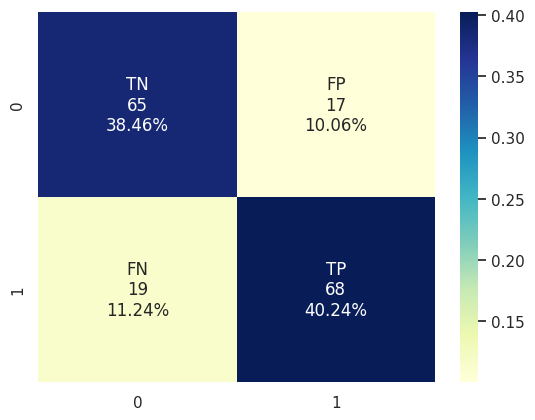

In [48]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :')
print(cm)
print ('Report : ')
print (classification_report(y_test, y_pred))
names = ['TN','FP','FN','TP']
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm/np.sum(cm), annot=labels, fmt='', cmap="YlGnBu")
plt.show()

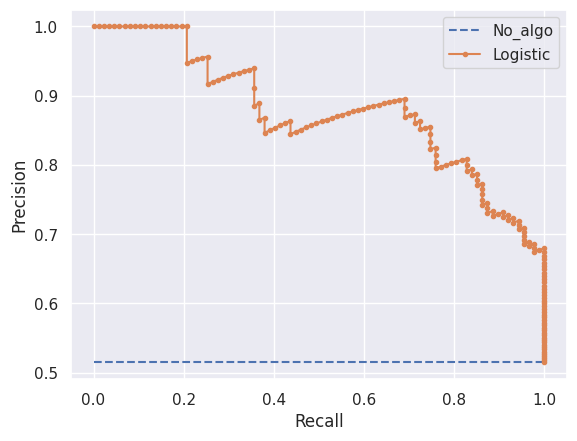

In [42]:
# plot kura precision-recall
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No_algo')
plt.plot(model_recall, model_precision, marker='.', label='Logistic')

# label pada axis
plt.xlabel('Recall')
plt.ylabel('Precision')

# legend
plt.legend()
plt.show()

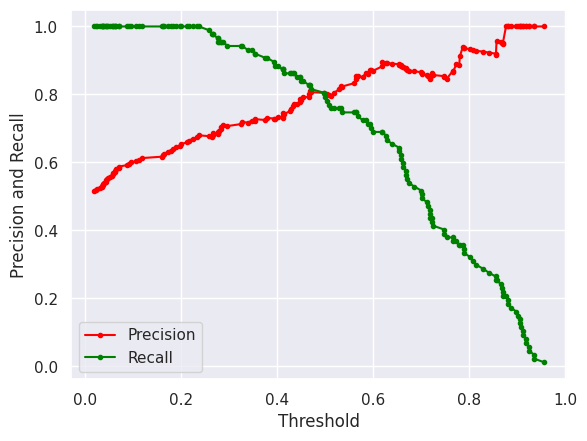

In [43]:
model_precision, model_recall, th = precision_recall_curve(y_test, model_probs)

# plot the precision-recall curves
plt.plot(th, model_precision[:-1], marker='.', label='Precision', color = "red")
plt.plot(th, model_recall[:-1], marker='.', label='Recall', color = "green")
plt.xlabel('Threshold')
plt.ylabel('Precision and Recall')
plt.legend()
plt.show()

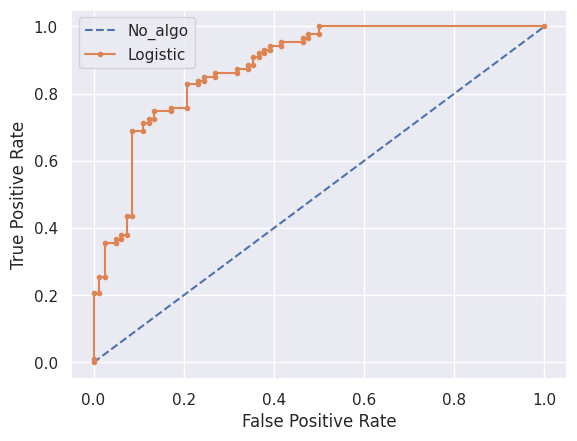

In [44]:

# generate a no algo prediction (majority class)
na_probs = [0 for _ in range(len(y_test))]

# calculate scores
na_auc = roc_auc_score(y_test, na_probs)
lr_auc = roc_auc_score(y_test, model_probs)

# calculate roc curves
na_fpr, na_tpr, _ = roc_curve(y_test, na_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)

# plot the roc curve for the model
plt.plot(na_fpr, na_tpr, linestyle='--', label='No_algo')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()